## Mapping and analysing the presidential visits of superpower leaders

In this notebook I map and analyze the target countries of presidential visits by China, US and Russia

In [11]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
#importing the final data that has been modified so that the names match to the geopanda names for later analysis.
df=pd.read_csv("../data/All data_geopanda_names2.csv", header=0,encoding = 'unicode_escape', parse_dates=["Date start", "Date end"])

This is all the data of presidential traveling by Chinese, Russian and US presidents since 2001. Note that these travels include also all the multilater visits such as summits. They are filtered out in the course of the analysis.

In [266]:
df.head()

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link
0,1.0,USA,W. BUSH,NaN,Mexico,San Cristobal,2001-02-16,2001-02-16,Meeting with President Fox.,NaN,NaN,NaN
1,2.0,USA,W. BUSH,NaN,Canada,Quebec,2001-04-20,2001-04-22,Attended the Summit of the Americas.,NaN,NaN,NaN
2,3.0,USA,W. BUSH,NaN,Spain,Madrid,2001-12-06,2001-06-13,Met with King Juan Carlos I and President Aznar.,NaN,NaN,NaN
3,4.0,USA,W. BUSH,NaN,Belgium,Brussels,2001-06-13,2001-06-14,Attended NATO Summit Meeting.,NaN,NaN,NaN
4,5.0,USA,W. BUSH,NaN,Sweden,Goteborg,2001-06-14,2001-06-15,Attended U.S.-European Union Summit Meeting; m...,NaN,NaN,NaN


In [268]:
#962 visits altogether
df.shape

(962, 12)

In [269]:
#extracting year to new frame
df['year'] = pd.DatetimeIndex(df['Date start']).year
df.head()

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
0,1.0,USA,W. BUSH,NaN,Mexico,San Cristobal,2001-02-16,2001-02-16,Meeting with President Fox.,NaN,NaN,NaN,2001
1,2.0,USA,W. BUSH,NaN,Canada,Quebec,2001-04-20,2001-04-22,Attended the Summit of the Americas.,NaN,NaN,NaN,2001
2,3.0,USA,W. BUSH,NaN,Spain,Madrid,2001-12-06,2001-06-13,Met with King Juan Carlos I and President Aznar.,NaN,NaN,NaN,2001
3,4.0,USA,W. BUSH,NaN,Belgium,Brussels,2001-06-13,2001-06-14,Attended NATO Summit Meeting.,NaN,NaN,NaN,2001
4,5.0,USA,W. BUSH,NaN,Sweden,Goteborg,2001-06-14,2001-06-15,Attended U.S.-European Union Summit Meeting; m...,NaN,NaN,NaN,2001


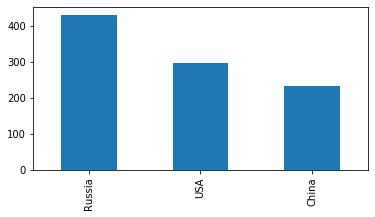

In [270]:
#number of trips by country president
df["Country of president"].value_counts().plot(kind='bar', figsize=(6,3))
pass

In [271]:
#how many visits per president
df["Country of president"].value_counts()

Russia    431
USA       297
China     233
Name: Country of president, dtype: int64

In [275]:
#Since Putin has been in power the longest, a big part of the visits are done by him.  
df["President"].value_counts()

Putin              317
W. BUSH            140
OBAMA              120
Dmitry Medvedev    115
Hu Jintao          114
Xi Jinping          96
TRUMP               37
Jiang Zemin         23
Name: President, dtype: int64

In [276]:
#how many unique countries visited totally
df["Location country"].nunique()

132

In [25]:
#Finding travels per year per superpower
visits_country_year = df.groupby(["Country of president", "year"]).size().reset_index().rename(columns={0:"total"})

In [26]:
visits_country_year.head()

,Country of president,year,total
0,China,2001,12
1,China,2002,11
2,China,2003,5
3,China,2004,15
4,China,2005,17


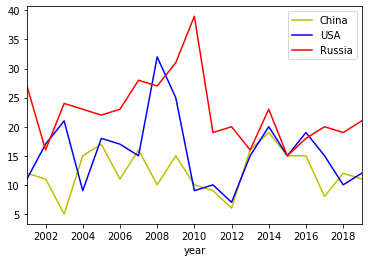

In [27]:
#drawing a graph.  
ax = plt.axes()
#China
visits_country_year.loc[
    lambda x: x["Country of president"] == "China"
].set_index("year")["total"].plot(kind="line", color="y", ax=ax, label="China", legend=True)
#USA
visits_country_year.loc[
    lambda x: x["Country of president"] == "USA"
].set_index("year")["total"].plot(kind="line", color="b", ax=ax, label="USA", legend=True)
#Russia
visits_country_year.loc[
    lambda x: x["Country of president"] == "Russia"
].set_index("year")["total"].plot(kind="line", color="r", ax=ax, label="Russia", legend=True)
pass

In [13]:
#the most visited countries in total
df["Location country"].value_counts().head(10)

Kazakhstan        48
Germany           46
France            41
Italy             29
Russia            28
United Kingdom    26
Ukraine           25
Belarus           25
China             23
Japan             22
Name: Location country, dtype: int64

In [14]:
df[df['Location country']=='Saudi Arabia'] 
#US has made several visits but Putin just made tha last in 12 years this year

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
113,114.0,USA,W. BUSH,NaN,Saudi Arabia,"Riyadh, Al-Janadriyah",2008-01-14,2008-01-16,Met with King Abdullah.,NaN,NaN,NaN,2008
125,126.0,USA,W. BUSH,NaN,Saudi Arabia,"Riyadh, Al-Janadriyah",2008-05-16,2008-05-17,Met with King Abdullah.,NaN,NaN,NaN,2008
149,150.0,USA,OBAMA,NaN,Saudi Arabia,Riyadh,2009-03-06,2009-04-06,Met with King Abdullah.,NaN,NaN,NaN,2009
210,211.0,USA,OBAMA,NaN,Saudi Arabia,"Riyadh, Rawdat Khurain",2014-03-28,2014-03-29,Met with King Abdullah bin Abdel Aziz al-Saud.,NaN,NaN,NaN,2014
228,229.0,USA,OBAMA,NaN,Saudi Arabia,Riyadh,2015-01-27,2015-01-27,Met with King Salman bin Abdel Aziz al-Saud an...,NaN,NaN,NaN,2015
244,245.0,USA,OBAMA,NaN,Saudi Arabia,Riyadh,2016-04-20,2016-04-21,Met with King Salman bin Abd-al Aziz Al Saud a...,NaN,NaN,NaN,2016
260,261.0,USA,TRUMP,NaN,Saudi Arabia,Riyadh,2017-05-20,2017-05-22,Met with King Salman bin Abdel Aziz Al-Saud. S...,NaN,NaN,NaN,2017
302,303.0,Russia,Putin,NaN,Saudi Arabia,NaN,2019-10-14,NaT,State visit to Saudi Arabia,NaN,NaN,http://en.kremlin.ru/events/president/trips/61823,2019
591,590.0,Russia,Putin,NaN,Saudi Arabia,NaN,2007-11-02,NaT,President Vladimir Putin and King of Saudi Ara...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45610,2007
774,793.0,China,Xi Jinping,NaN,Saudi Arabia,Riyadh,2016-01-19,2016-01-20,Lifting China-Saudi ties to comprehensive stra...,"Xi Jinping, Mohammed bin Salman, Xi Jinping, I...",http://news.xinhuanet.com/english/2016-01/21/c...,http://www.chinavitae.com//vip/index.php?mode=...,2016


Some other interesting target countries

In [15]:
df[df['Location country']=='Greece'] 
#China made several visits after economic crisis started in Greece

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
257,258.0,USA,OBAMA,NaN,Greece,Athens,2016-11-15,2016-11-16,Met with President Prokopios Pavlopoulis and P...,NaN,NaN,NaN,2016
373,373.0,Russia,Putin,NaN,Greece,NaN,2016-05-27,NaT,Meeting with Greek President Prokopis Pavlopoulos,NaN,NaN,http://en.kremlin.ru/events/president/trips/52034,2016
587,586.0,Russia,Putin,NaN,Greece,NaN,2007-03-15,NaT,"Russian President Vladimir Putin, Greek Prime ...",NaN,NaN,http://en.kremlin.ru/events/president/trips/45624,2007
605,604.0,Russia,Putin,NaN,Greece,NaN,2006-04-09,NaT,President Vladimir Putin met with Greek Prime ...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45592,2006
705,704.0,Russia,Putin,NaN,Greece,NaN,2001-06-12,NaT,President Vladimir Putin held negotiations wit...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45564,2001
730,749.0,China,Xi Jingping,NaN,Greece,Athens,2019-10-11,2019-10-11,Xi Jinping arrived in Greece for state visit,NaN,http://www.xinhuanet.com/english/2019-11/11/c_...,http://chinavitae.com/vip/index.php?mode=show&...,2019
802,821.0,China,Xi Jinping,NaN,Greece,Rhodes,2014-07-13,2014-07-13,"#China, #Greece agree to enhance comprehensive...","Xi Jinping, Antonis Samaras, Xi Jinping, Karol...",http://news.xinhuanet.com/english/china/2014-0...,http://www.chinavitae.com//vip/index.php?mode=...,2014
865,884.0,China,Hu Jintao,NaN,Greece,Athens,2008-11-24,2008-11-25,Hu Jintao held talks with Greek President Karo...,"Hu Jintao, Chen Deming, Dai Bingguo, Ling Jihu...",http://news.xinhuanet.com/english/2008-11/26/c...,http://www.chinavitae.com//vip/index.php?mode=...,2008


In [16]:
#The Philippines has been an US stroghold but also China is interested in it.
df[df['Location country']=='Philippines'] 

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
42,43.0,USA,W. BUSH,NaN,Philippines,Manila,2003-10-18,2003-10-19,Addressed a joint session of the Philippine Co...,NaN,NaN,NaN,2003
215,216.0,USA,OBAMA,NaN,Philippines,"Manila, Taguig",2014-04-28,2014-04-29,Met with President Benigno S. Aquino 3rd. Atte...,NaN,NaN,NaN,2014
238,239.0,USA,OBAMA,NaN,Philippines,Manila,2015-11-17,2015-11-20,"Attended the Trans-Pacific Partnership, Pacifi...",NaN,NaN,NaN,2015
274,275.0,USA,TRUMP,NaN,Philippines,Manila,2017-12-11,2017-11-14,Met with President Rodrigo Duterte and attende...,NaN,NaN,NaN,2017
778,797.0,China,Xi Jinping,NaN,Philippines,Manila,2015-11-17,2015-11-20,China opportunities expected as Xi arrives in ...,"Xi Jinping, Leung Chun-ying, Xi Jinping",http://news.xinhuanet.com/english/2015-11/20/c...,http://www.chinavitae.com//vip/index.php?mode=...,2015
916,935.0,China,Hu Jintao,NaN,Philippines,Manila,2005-04-27,2005-04-27,"Hu Jintao met with Haruhiko Kuroda, President...","Hu Jintao, Bo Xilai, Jin Renqing, Li Zhaoxing,...",NaN,http://www.chinavitae.com//vip/index.php?mode=...,2005


In [17]:
df[df['Location country']=='Indonesia'] 
#Indonesia has been important strategic partner for the US but late China has strenghtened ties with it

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
45,46.0,USA,W. BUSH,NaN,Indonesia,Denpasar (Bali),2003-10-22,2003-10-22,Met with President Sukarnoputri and Muslim rel...,NaN,NaN,NaN,2003
89,90.0,USA,W. BUSH,NaN,Indonesia,"Jakarta, Bogor",2006-11-20,2006-11-20,Met with President Yudhoyono.,NaN,NaN,NaN,2006
169,170.0,USA,OBAMA,NaN,Indonesia,Jakarta,2010-09-11,2010-10-11,Met with President Yudhoyono.,NaN,NaN,NaN,2010
183,184.0,USA,OBAMA,NaN,Indonesia,Bali,2011-11-17,2011-11-20,Attended the ASEAN and East Asia Summit Meetings.,NaN,NaN,NaN,2011
418,418.0,Russia,Putin,NaN,Indonesia,NaN,2013-07-10,NaT,Meeting with President of Indonesia Susilo Bam...,NaN,NaN,http://en.kremlin.ru/events/president/trips/19383,2013
577,576.0,Russia,Putin,NaN,Indonesia,NaN,2007-06-09,NaT,President Vladimir Putin has arrived in Indone...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45728,2007
788,807.0,China,Xi Jinping,NaN,Indonesia,Jakarta,2015-04-21,2015-04-23,Xi Jinping Arrives in Jakarta for Attendance o...,"Xi Jinping, Joko Widodo, Xi Jinping, Shinzo Ab...",http://news.xinhuanet.com/english/2015-04/23/c...,http://www.chinavitae.com//vip/index.php?mode=...,2015
809,828.0,China,Xi Jinping,NaN,Indonesia,Bali,2013-05-10,2013-08-10,#Chinese president arrives in Bali island for ...,"Xi Jinping, Yingluck Shinawatra, Xi Jinping, S...",http://news.xinhuanet.com/english/china/2013-1...,http://www.chinavitae.com//vip/index.php?mode=...,2013
811,830.0,China,Xi Jinping,NaN,Indonesia,Jakarta,2013-02-10,2013-03-10,#China proposes establishing Asian infrastruct...,"Xi Jinping, Susilo Bambang Yudhoyono, Xi Jinpi...",http://news.xinhuanet.com/english/china/2013-1...,http://www.chinavitae.com//vip/index.php?mode=...,2013
917,936.0,China,Hu Jintao,NaN,Indonesia,Jakarta,2005-04-22,2005-04-25,"Hu Jintao met with Than Shwe, chairman of the ...","Hu Jintao, Bo Xilai, Jin Renqing, Li Zhaoxing,...",NaN,http://www.chinavitae.com//vip/index.php?mode=...,2005


In [18]:
df[df['Location country']=='Egypt'] 
#African country that all the presidents try visit regularly

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
33,34.0,USA,W. BUSH,NaN,Egypt,Sharm el-Sheikh,2003-02-06,2003-03-06,Attended âRed Sea Summitâ with the leaders...,NaN,NaN,NaN,2003
114,115.0,USA,W. BUSH,NaN,Egypt,Sharm el-Sheikh,2008-01-16,2008-01-16,Met with President Mubarak.,NaN,NaN,NaN,2008
126,127.0,USA,W. BUSH,NaN,Egypt,Sharm el-Sheikh,2008-05-17,2008-05-18,"Met with President Mubarak, King Abdullah II o...",NaN,NaN,NaN,2008
150,151.0,USA,OBAMA,NaN,Egypt,Cairo,2009-04-06,2009-04-06,Met with President Mubarak and delivered and a...,NaN,NaN,NaN,2009
338,338.0,Russia,Putin,NaN,Egypt,NaN,2017-11-12,NaT,Vladimir Putin arrived on working visit in Egypt,NaN,NaN,http://en.kremlin.ru/events/president/trips/56360,2017
389,389.0,Russia,Putin,NaN,Egypt,NaN,2015-09-02,NaT,Vladimir Putin arrived in Egypt on an official...,NaN,NaN,http://en.kremlin.ru/events/president/trips/47656,2015
531,530.0,Russia,Dmitry Medvedev,NaN,Egypt,NaN,2009-06-23,NaT,During his official visit to the Arab Republic...,NaN,NaN,http://en.kremlin.ru/events/president/trips/4891,2009
632,631.0,Russia,Putin,NaN,Egypt,NaN,2005-04-26,NaT,Vladimir Putin has arrived in Egypt on a worki...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45555,2005
773,792.0,China,Xi Jinping,NaN,Egypt,Cairo,2016-01-20,2016-01-22,Chinese president arrives in Egypt for state v...,"Xi Jinping, Abdel Fattah al-Sisi, Xi Jinping, ...",http://news.xinhuanet.com/english/2016-01/23/c...,http://www.chinavitae.com//vip/index.php?mode=...,2016
921,940.0,China,Hu Jintao,NaN,Egypt,Cairo,2004-11-21,2004-11-21,Hu Jintao met with Japanese Prime Minister Jun...,"Hu Jintao, Bo Xilai, Li Zhaoxing, Ma Kai, Wang...",NaN,http://www.chinavitae.com//vip/index.php?mode=...,2004


In [19]:
df[df['Location country']== 'Portugal']

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
28,29.0,USA,W. BUSH,NaN,Portugal,Terceira Island (Azores),2003-03-16,2003-03-16,Discussed the Iraq crisis with British Prime M...,NaN,NaN,NaN,2003
172,173.0,USA,OBAMA,NaN,Portugal,Lisbon,2010-11-19,2010-11-20,Attended the NATO and U.S.-European Union Summ...,NaN,NaN,NaN,2010
472,472.0,Russia,Dmitry Medvedev,NaN,Portugal,NaN,2010-11-20,NaT,Meeting of the NATO-Russia Council,NaN,NaN,http://en.kremlin.ru/events/president/trips/9571,2010
567,566.0,Russia,Putin,NaN,Portugal,NaN,2007-10-26,NaT,President Vladimir Putin met with members of t...,NaN,NaN,http://en.kremlin.ru/events/president/trips/48864,2007
568,567.0,Russia,Putin,NaN,Portugal,NaN,2007-10-25,NaT,"During a working visit to Portugal, President ...",NaN,NaN,http://en.kremlin.ru/events/president/trips/45742,2007
643,642.0,Russia,Putin,NaN,Portugal,NaN,2004-11-23,NaT,President Vladimir Putin began his official vi...,NaN,NaN,http://en.kremlin.ru/events/president/trips/45542,2004
740,759.0,China,Xi Jinping,NaN,Portugal,Lisbon,2018-03-12,2018-05-12,"Portuguese president calls ties with China ""ex...","Xi Jinping, Marcelo Rebelo de Sousa, Xi Jinpin...",http://www.xinhuanet.com/english/2018-12/06/c_...,http://www.chinavitae.com//vip/index.php?mode=...,2018
797,816.0,China,Xi Jinping,NaN,Portugal,Terceira Island,2014-07-24,2014-07-24,China stands ready to deepen cooperation with ...,"Xi Jinping, Paulo Portas",http://news.xinhuanet.com/english/china/2014-0...,http://www.chinavitae.com//vip/index.php?mode=...,2014
842,861.0,China,Hu Jintao,NaN,Portugal,Lisbon,2010-06-11,2010-08-11,Chinese president arrives in Lisbon for state ...,"Hu Jintao, Anibal Cavaco Silva, Hu Jintao, Jos...",http://news.xinhuanet.com/english2010/china/20...,http://www.chinavitae.com//vip/index.php?mode=...,2010
925,944.0,China,Hu Jintao,NaN,Portugal,Porto,2004-10-11,2004-10-11,Hu Jintao met with Portuguese Prime Minister P...,"Hu Jintao, Bo Xilai, Li Zhaoxing, Ma Kai, Wang...",NaN,http://www.chinavitae.com//vip/index.php?mode=...,2004


## Most visits per superpower

In [20]:
USA_visits=df[df["Country of president"]=='USA'].copy()
USA_visits["Location country"].value_counts().head(15)

Germany           20
France            14
United Kingdom    13
Japan             13
Mexico            11
Italy             10
South Korea        9
Russia             9
China              8
Canada             8
Vatican City       8
Afghanistan        7
Poland             7
Saudi Arabia       7
Iraq               6
Name: Location country, dtype: int64

In [21]:
Russia_visits=df[df["Country of president"]=='Russia'].copy()
Russia_visits["Location country"].value_counts().head(25)

Kazakhstan                  37
Belarus                     23
Ukraine                     22
France                      21
Germany                     21
Tajikistan                  19
Italy                       16
China                       15
Turkey                      14
Kyrgyzstan                  12
Finland                     12
India                       10
Turkmenistan                10
Azerbaijan                  10
United States of America    10
Uzbekistan                   9
United Kingdom               9
Armenia                      8
Belgium                      8
Vietnam                      6
South Korea                  6
Hungary                      5
Japan                        5
Brazil                       4
Greece                       4
Name: Location country, dtype: int64

In [22]:
China_visits=df[df["Country of president"]=='China']
China_visits["Location country"].value_counts().head(15)

Russia                      19
United States of America    12
Kazakhstan                  11
France                       6
Germany                      5
Brazil                       5
South Korea                  5
India                        5
South Africa                 5
Portugal                     4
Uzbekistan                   4
Indonesia                    4
Spain                        4
Mexico                       4
Cuba                         4
Name: Location country, dtype: int64

## Comparison

In [28]:
df.groupby(["Country of president", "Location country"]).size().sort_values(ascending=False).head(10)

Country of president  Location country
Russia                Kazakhstan          37
                      Belarus             23
                      Ukraine             22
                      Germany             21
                      France              21
USA                   Germany             20
China                 Russia              19
Russia                Tajikistan          19
                      Italy               16
                      China               15
dtype: int64

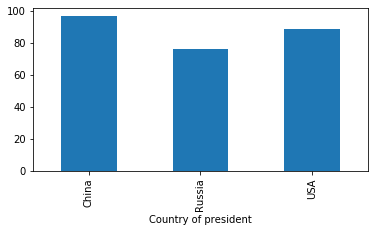

In [29]:
#individual countries visited by superpower president
df.groupby(["Country of president"])["Location country"].nunique().plot(kind='bar', figsize=(6,3))
pass

In [30]:
#how many unique countries per president
df.groupby(["Country of president"])["Location country"].nunique()

Country of president
China     97
Russia    76
USA       89
Name: Location country, dtype: int64

## Mapping the countries visited

In [31]:
#bringing in the geopanda data
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [32]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


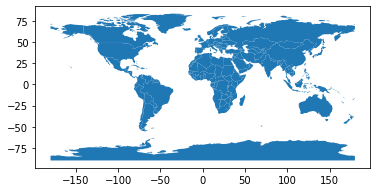

In [33]:
world.plot()
pass

First we are creating a map that shows the most visited areas

In [34]:
country_counts = df["Location country"].value_counts().to_frame()

In [35]:
country_counts=country_counts.reset_index()

In [36]:
country_counts.head()

,index,Location country
0,Kazakhstan,48
1,Germany,46
2,France,41
3,Italy,29
4,Russia,28


In [37]:
country_counts=country_counts.rename(columns={'index':'location_country', "Location country": "count"})

In [38]:
country_counts.head()

,location_country,count
0,Kazakhstan,48
1,Germany,46
2,France,41
3,Italy,29
4,Russia,28


In [39]:
world_counts = world.merge(
    country_counts,
    left_on="name",
    right_on="location_country",
    how="left"
)

This map shows the areas that were visited the most overall. Africa is clearly he emptiest one. Also eastern-central Europe and parts of the Middle East are rarely visited.

C:\Users\Satu\AppData\Local\Programs\Python\Python37-32\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


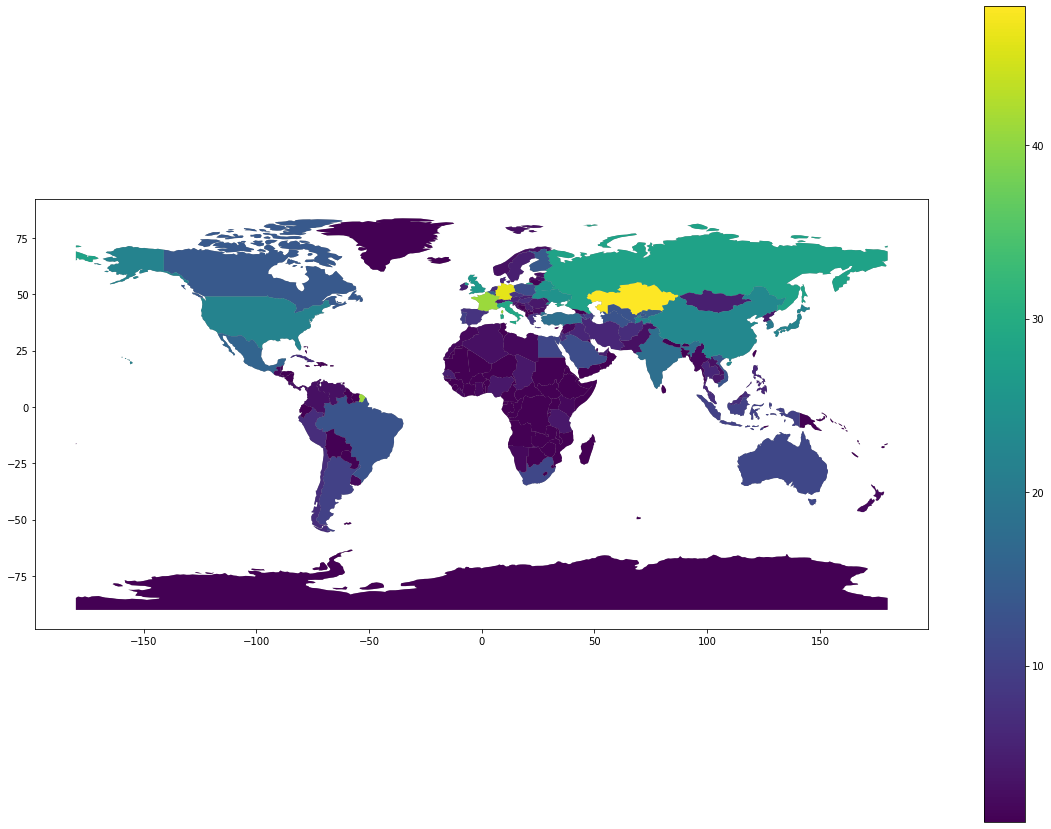

In [40]:
fig, ax = plt.subplots(1,figsize=(20, 15))
world.plot(color="gray", ax=ax)
world_counts.plot(column='count', ax=ax, legend=True)
pass

Note: according to Natural Earth update annoncement the figures are from 2016-207 and mainly based on CIA World Factbook

In [41]:
world_counts.head(20) 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,location_country,count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,4.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,14.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,22.0
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,48.0
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,13.0
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,1.0
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,10.0
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,10.0


# countries that are never visited

Next we will check which countries have not been visited by superpower leader since 2001

In [42]:
null_countries=world_counts.loc[
    lambda x: x["count"].isnull()
]

In [44]:
#Note if you don't count sovereign states 44 countries haven't been visited by any of the leaders.
null_countries.shape

(52, 8)

In [45]:
#Here are the not visited countries sorted by the population
null_countries[["name", "continent", "pop_est"]].sort_values("pop_est", ascending=False)

,name,continent,pop_est
157,Yemen,Asia,28036829
78,Madagascar,Africa,25054161
60,Côte d'Ivoire,Africa,24184810
140,Taiwan,Asia,23508428
65,Burkina Faso,Africa,20107509
55,Niger,Africa,19245344
71,Malawi,Africa,19196246
176,S. Sudan,Africa,13026129
61,Guinea,Africa,12413867
75,Burundi,Africa,11466756


In [47]:
#Mapping the not visited countries
plt.rcParams["figure.figsize"] = (20, 20)

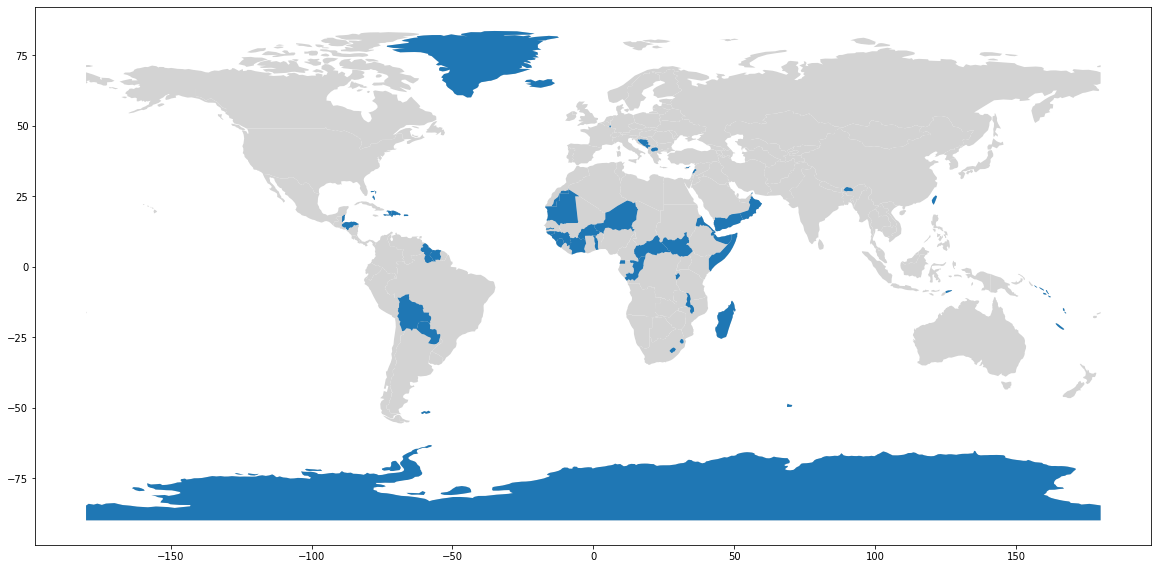

In [48]:
ax =world.plot(color="lightgrey")
world_counts.loc[
    lambda x: x["count"].isnull()
].plot(ax=ax)
pass

In [49]:
null_countries_drop=null_countries.drop(['geometry'], axis=1)
#to make the next analysis easier

## Analyzing the countries that are not visited

In [50]:
#By population

null_countries.sort_values(by="pop_est", ascending=False).head(10)[["continent", "name", "pop_est"]]

#Out of the most populated countries never vistied, two are in Asia and 8 in Africa 

,continent,name,pop_est
157,Asia,Yemen,28036829
78,Africa,Madagascar,25054161
60,Africa,Côte d'Ivoire,24184810
140,Asia,Taiwan,23508428
65,Africa,Burkina Faso,20107509
55,Africa,Niger,19245344
71,Africa,Malawi,19196246
176,Africa,S. Sudan,13026129
61,Africa,Guinea,12413867
75,Africa,Burundi,11466756


In [51]:
#by gdp as collected by geopandas
null_countries.sort_values(by="gdp_md_est", ascending=False).head(15)[["continent", "name", "gdp_md_est"]]
#Taiwan, Oman , Dominican have by far the highest gdp of the countries that haven't been visited

,continent,name,gdp_md_est
140,Asia,Taiwan,1127000.0
88,Asia,Oman,173100.0
17,North America,Dominican Rep.,161900.0
45,North America,Puerto Rico,131000.0
60,Africa,Côte d'Ivoire,87120.0
77,Asia,Lebanon,85160.0
30,South America,Bolivia,78350.0
157,Asia,Yemen,73450.0
156,South America,Paraguay,64670.0
128,Europe,Luxembourg,58740.0


Since the gdp as such does not tell much, let's see countries by gdp ranking according to the UN data (2017)

In [52]:
# ranking per capita
df_ranking=pd.read_csv("../data/gdp2017_ranking_UN.csv")

In [53]:
df_ranking.head()

,Rank,name,US$
0,1,Liechtenstein,"166,022"
1,2,Monaco,"165,421"
2,3,Luxembourg,"106,806"
3,0,Bermuda,"102,192"
4,0,Macau,"80,893"


In [223]:
#ranking by nominal gdp
df_gdp_norm_ranking=pd.read_csv("../data/gdp3.csv")

In [224]:
df_ranking.shape #ranking by UN 2017

(214, 3)

In [56]:
null_countries_gdp_ranking2017=pd.merge(df_ranking, null_countries_drop, left_on='name', right_on='name')

In [57]:
UN2017_all_null_countries=pd.merge(null_countries_gdp_ranking2017, df_gdp_norm_ranking, left_on='name', right_on='Country/Territory')

In [58]:
UN2017_all_null_countries.shape

(39, 12)

In [239]:
UN2017_all_null_countries.head()

,Rank,name,US$,pop_est,continent,iso_a3,gdp_md_est,location_country,count,Rank/wholegdp,Country/Territory,GDP (US$million)
0,3,Luxembourg,"106,806",594130,Europe,LUX,58740.0,NaN,NaN,72,Luxembourg,"62,316"
1,6,Iceland,"73,060",339747,Europe,ISL,16150.0,NaN,NaN,104,Iceland,"24,476"
2,0,Greenland,"49,398",57713,North America,GRL,2173.0,NaN,NaN,0,Greenland,"2,441"
3,0,New Caledonia,"35,815",279070,Oceania,NCL,10770.0,NaN,NaN,0,New Caledonia,"9,894"
4,0,Puerto Rico,"28,451",3351827,North America,PRI,131000.0,NaN,NaN,0,Puerto Rico,"104,218"


In [243]:
#Not visited countries with gdp rankings by nominal gdp.
UN2017_all_null_countries\
    .loc[lambda x: x["Rank/wholegdp"] != 0]\
    .sort_values(by="Rank/wholegdp", ascending=True)\
    .head(13)[["name", "continent", 'Rank/wholegdp']]

#Dominican Republic and Oman  are in highest place of independent countries. 
#8 countries make it into top 100 in UN ranking but even the highest, Dominican Republic is only the 66th.


,name,continent,Rank/wholegdp
7,Dominican Rep.,North America,66
5,Oman,Asia,70
0,Luxembourg,Europe,72
6,Lebanon,Asia,80
21,Côte d'Ivoire,Africa,89
14,Bolivia,South America,92
13,Paraguay,South America,96
25,Yemen,Asia,97
1,Iceland,Europe,104
18,Honduras,North America,105


In [60]:
#ranking per gdp per capita
null_countries_gdp_ranking2017['Rank'] = null_countries_gdp_ranking2017['Rank'].astype(int)
null_countries_gdp_ranking2017\
    .loc[lambda x: x["Rank"] != 0]\
    .sort_values("Rank", ascending=True)\
    .head(40)[["name", "continent", "gdp_md_est", "Rank"]]
#this shows that only 8 of not visited countries make it to top 100 ranking by gdp per capita

,name,continent,gdp_md_est,Rank
0,Luxembourg,Europe,58740.0,3
1,Iceland,Europe,16150.0,6
5,Oman,Asia,173100.0,52
6,Lebanon,Asia,85160.0,73
7,Dominican Rep.,North America,161900.0,81
8,Montenegro,Europe,10610.0,83
9,Suriname,South America,8547.0,84
10,Bosnia and Herz.,Europe,42530.0,98
11,Belize,North America,3088.0,100
12,Guyana,South America,6093.0,102


# Where China goes

Back to the countries that are visited. Looking at all the superpowers individually.

In [61]:
China=df[df["Country of president"]=='China']

In [62]:
China.head()

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
729,748.0,China,Xi Jinping,NaN,Brazil,Brazil,2019-11-14,2019-11-14,Xi Jinping called on the BRICS countries to un...,"Xi Jinping, Vladimir Putin, Jair Bolsonaro, Na...",http://www.xinhuanet.com/english/2019-11/15/c_...,http://chinavitae.com/vip/index.php?mode=show&...,2019
730,749.0,China,Xi Jinping,NaN,Greece,Athens,2019-10-11,2019-10-11,Xi Jinping arrived in Greece for state visit,NaN,http://www.xinhuanet.com/english/2019-11/11/c_...,http://chinavitae.com/vip/index.php?mode=show&...,2019
731,750.0,China,Xi Jinping,NaN,Nepal,Kathmandu,2019-12-10,2019-10-13,Xi met with President of the Nepali Congress P...,"Xi Jinping, Bidya Devi Bhandari,K.P. Sharma Ol...",http://www.xinhuanet.com/english/2019-10/13/c_...,http://chinavitae.com/vip/index.php?mode=show&...,2019
732,751.0,China,Xi Jinping,NaN,India,Chennai,2019-11-10,2019-12-10,"Xi Jinping met with Narendra Modi in Chennai, ...","Xi Jinping, Narendra Modi",http://www.xinhuanet.com/english/2019-10/12/c_...,http://chinavitae.com/vip/index.php?mode=show&...,2019
733,752.0,China,Xi Jinping,NaN,Japan,Osaka,2019-06-28,2019-06-29,Xi urges BRICS to strengthen strategic partner...,"Xi Jinping, Jair Bolsonaro, Vladimir Putin, Na...",http://www.xinhuanet.com/english/2019-06/29/c_...,http://www.chinavitae.com//vip/index.php?mode=...,2019


In [63]:
china_counts = China["Location country"].value_counts().to_frame().reset_index()

In [64]:
china_counts.head(15)

,index,Location country
0,Russia,19
1,United States of America,12
2,Kazakhstan,11
3,France,6
4,South Korea,5
5,India,5
6,Brazil,5
7,South Africa,5
8,Germany,5
9,Spain,4


In [65]:
#creating a merge with geopandas for mapping
china_world_counts = world.merge(
    china_counts,
    left_on="name",
    right_on="index",
    how="left"
)

In [66]:
china_world_counts.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,Location country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,3.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,12.0


In [69]:
def generate_country_map(country_df, map_path):
    ax =world.plot(color="lightgrey")
    country_with_counts = country_df.loc[
        lambda x: x["Location country"].notnull()
    ].copy()
    country_with_counts["country_counts"] = country_with_counts["Location country"].astype(int)
    country_with_counts.plot(
        column='country_counts', 
        ax=ax, 
        cmap='OrRd', 
        scheme='user_defined',
        classification_kwds={'bins':[1, 5, 15, 37]},
        legend=True
    )
    plt.savefig(map_path)

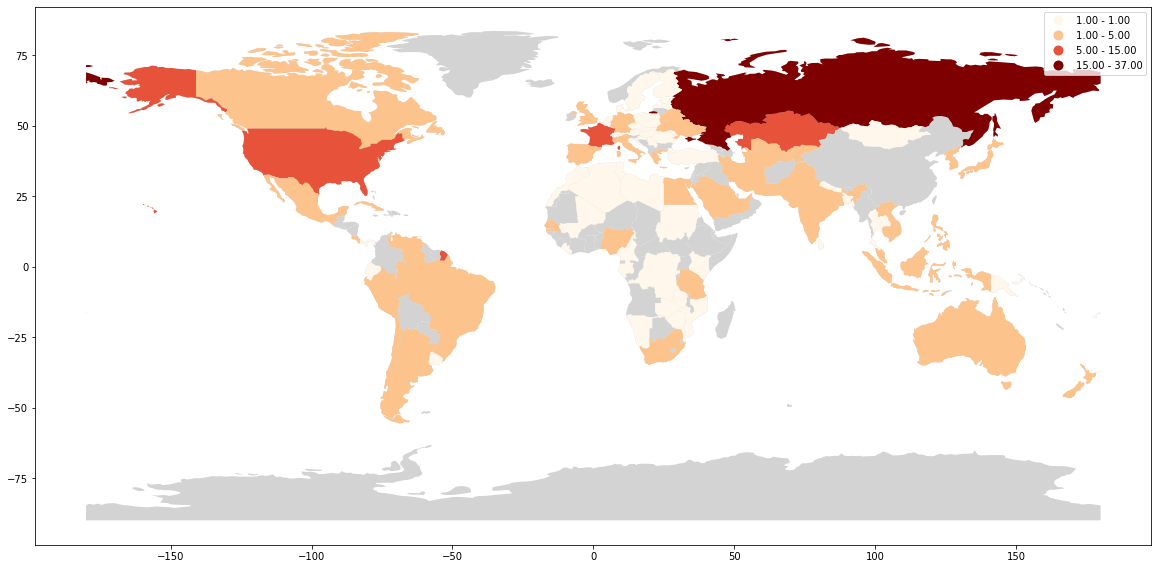

In [68]:
#this map shows in which countries China has been and how often 2001-2009
generate_country_map(china_world_counts, "../maps as svg files/china-map.svg")

# Where Russia goes?

In [70]:
#Same thing with Russsia, merging and mapping
Russia=df[df["Country of president"]=='Russia']

In [71]:
russia_counts = Russia["Location country"].value_counts().to_frame().reset_index()

In [72]:
russia_counts.head(15)

,index,Location country
0,Kazakhstan,37
1,Belarus,23
2,Ukraine,22
3,France,21
4,Germany,21
5,Tajikistan,19
6,Italy,16
7,China,15
8,Turkey,14
9,Kyrgyzstan,12


In [73]:
russia_world_counts = world.merge(
    russia_counts,
    left_on="name",
    right_on="index",
    how="left"
)

In [74]:
russia_world_counts.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,Location country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,3.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,10.0


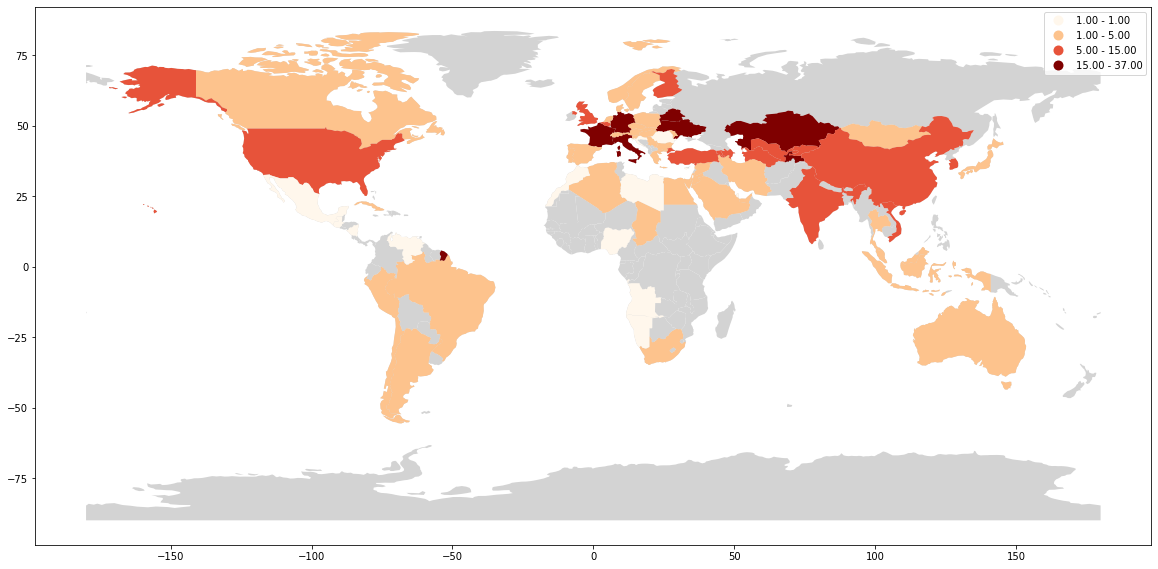

In [75]:
generate_country_map(russia_world_counts, "../maps as svg files/russia-map1.svg")

# Where USA goes?

In [76]:
USA=df[df["Country of president"]=='USA']

In [77]:
usa_counts = USA["Location country"].value_counts().to_frame().reset_index()

In [78]:
usa_counts.head(15)

,index,Location country
0,Germany,20
1,France,14
2,Japan,13
3,United Kingdom,13
4,Mexico,11
5,Italy,10
6,South Korea,9
7,Russia,9
8,Vatican City,8
9,China,8


In [79]:
usa_world_counts = world.merge(
    usa_counts,
    left_on="name",
    right_on="index",
    how="left"
)

In [80]:
usa_world_counts.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,Location country
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,8.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN


In [81]:
usa_world_counts.shape

(177, 8)

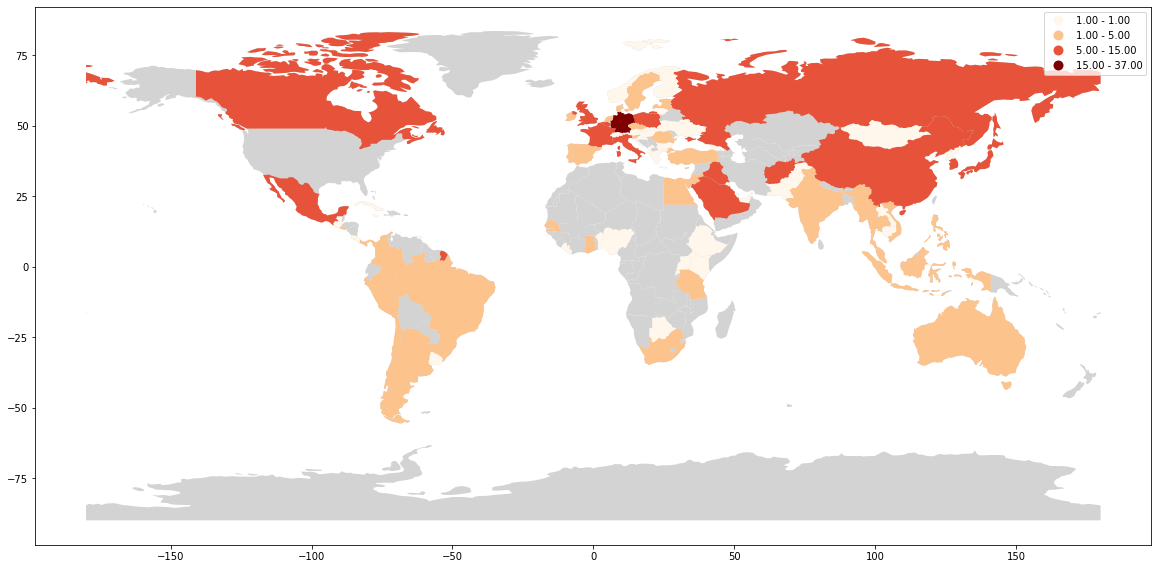

In [82]:
generate_country_map(usa_world_counts, "../maps as svg files/usa-map.svg")



## Then the whole world


Showing if the country is most often visited by US, China or Russia or even or none?

In [83]:
loc_country_grps = df.groupby(["Location country"])

In [84]:
country_info = pd.DataFrame({
    "visits": loc_country_grps.size(),
    "num_presidents": loc_country_grps["Country of president"].nunique(),
    "first_us_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "USA"]["Date start"].min()),
    "first_ru_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "Russia"]["Date start"].min()),
    "first_ch_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "China"]["Date start"].min()),
    "num_us_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "USA"])),
    "num_ru_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "Russia"])),
    "num_ch_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "China"]))
})

In [245]:
country_info.head()

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit
Location country,,,,,,,,
Afghanistan,7,1,2006-01-03,NaT,NaT,7,0,0
Albania,1,1,2007-10-06,NaT,NaT,1,0,0
Algeria,3,2,NaT,2006-10-03,2004-03-02,0,2,1
Angola,1,1,NaT,2009-06-26,NaT,0,1,0
Argentina,10,3,2005-03-11,2010-04-15,2001-07-04,3,3,4


In [246]:
#creating a new dataframe
def country_with_most_visits(row):
    country_counts = [row["num_us_visit"], row["num_ru_visit"], row["num_ch_visit"]]
    most = max(country_counts)
    countries_with_max = [ cc for cc in country_counts if cc == most]
    if len(countries_with_max) > 1:
        return "tie"
    elif row["num_us_visit"] == most:
        return "United States"
    elif row["num_ru_visit"] == most:
        return "Russia"
    else:
        return "China"

In [247]:
country_info["country_with_most_visits"] = country_info.apply(lambda x: country_with_most_visits(x), axis=1)

In [248]:
country_info.head()

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Afghanistan,7,1,2006-01-03,NaT,NaT,7,0,0,United States
Albania,1,1,2007-10-06,NaT,NaT,1,0,0,United States
Algeria,3,2,NaT,2006-10-03,2004-03-02,0,2,1,Russia
Angola,1,1,NaT,2009-06-26,NaT,0,1,0,Russia
Argentina,10,3,2005-03-11,2010-04-15,2001-07-04,3,3,4,China


In [249]:
merged = pd.merge(
    world,
    country_info,
    left_on="name",
    right_on="Location country",
    how="left"
)

In [250]:
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='orange', label='Color Patch'),
                   Patch(facecolor='red', label='Color Patch 2'),]
ax.legend(handles=legend_elements)
pass

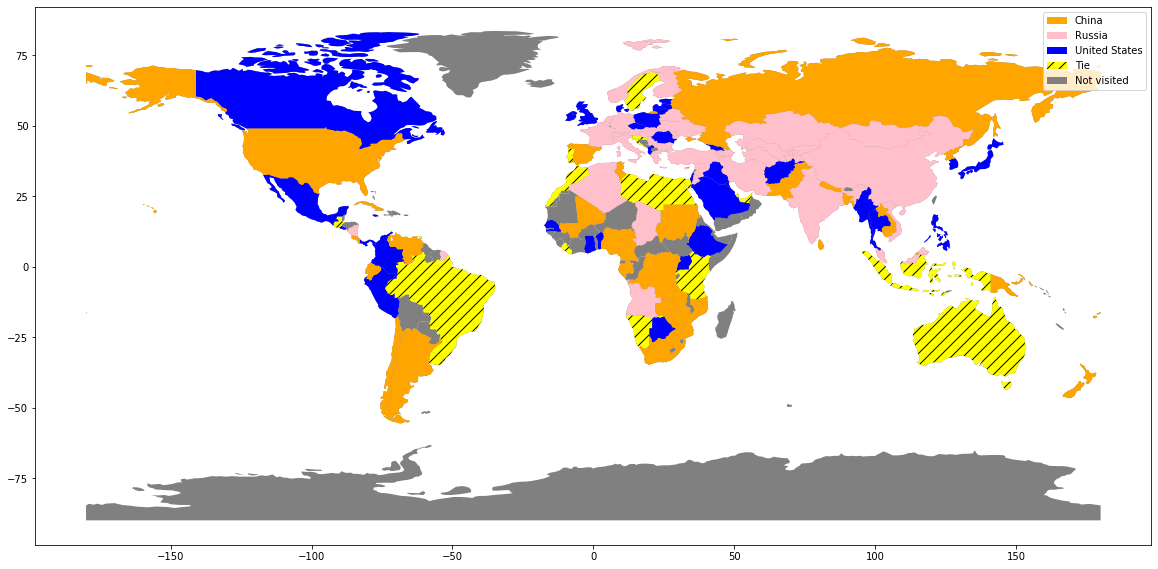

In [251]:
#making a map
ax = world.plot(color="grey", legend=True)
merged.loc[
    lambda x: x["country_with_most_visits"] == "tie"
].plot(ax=ax, color="yellow", hatch="//")
merged.loc[
    lambda x: x["country_with_most_visits"] == "United States"
].plot(ax=ax, color="blue")
merged.loc[
    lambda x: x["country_with_most_visits"] == "China"
].plot(ax=ax, color="orange")
merged.loc[
    lambda x: x["country_with_most_visits"] == "Russia"
].plot(ax=ax, color="pink")

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='orange', label='China'),
                   Patch(facecolor='pink', label='Russia'),
                   Patch(facecolor='blue', label='United States'),
                   Patch(facecolor='yellow', hatch='//', label='Tie'),
                   Patch(facecolor='grey', label='Not visited')
                   ]
ax.legend(handles=legend_elements)
pass

In [252]:
plt.savefig("../maps as svg files/all.svg")

<Figure size 1440x1440 with 0 Axes>

Making comparisons on who visited countries that others didn't

In [253]:
country_info[country_info["country_with_most_visits"] == "United States"]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Afghanistan,7,1,2006-01-03,NaT,NaT,7,0,0,United States
Albania,1,1,2007-10-06,NaT,NaT,1,0,0,United States
Bahrain,1,1,2008-12-01,NaT,NaT,1,0,0,United States
Benin,1,1,2008-02-16,NaT,NaT,1,0,0,United States
Botswana,1,1,2003-10-07,NaT,NaT,1,0,0,United States
Canada,14,3,2001-04-20,2002-06-26,2005-08-09,8,3,3,United States
Colombia,3,1,2004-11-22,NaT,NaT,3,0,0,United States
Czechia,8,3,2002-11-19,2006-01-03,2016-03-28,4,3,1,United States
Denmark,6,3,2005-05-07,2009-12-18,2012-06-14,3,2,1,United States


In [254]:
country_info[country_info["country_with_most_visits"] == "Russia"]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Algeria,3,2,NaT,2006-10-03,2004-03-02,0,2,1,Russia
Angola,1,1,NaT,2009-06-26,NaT,0,1,0,Russia
Armenia,8,1,NaT,2001-05-24,NaT,0,8,0,Russia
Austria,6,3,2006-06-20,2001-08-02,2011-10-29,1,4,1,Russia
Azerbaijan,10,1,NaT,2001-09-01,NaT,0,10,0,Russia
Belarus,25,2,NaT,2001-05-31,2001-07-19,0,23,2,Russia
Belgium,15,3,2001-06-13,2001-01-10,2014-03-30,6,8,1,Russia
Bulgaria,3,2,2007-10-06,2003-01-03,NaT,1,2,0,Russia
Chad,4,1,NaT,2002-11-27,NaT,0,4,0,Russia


In [256]:
country_info[country_info["country_with_most_visits"] == "China"]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Argentina,10,3,2005-03-11,2010-04-15,2001-07-04,3,3,4,China
Bangladesh,1,1,NaT,NaT,2016-10-14,0,0,1,China
Brunei,2,1,NaT,NaT,2005-04-20,0,0,2,China
Cambodia,4,2,2012-11-19,NaT,2012-03-30,1,0,3,China
Cameroon,1,1,NaT,NaT,2007-01-31,0,0,1,China
Chile,7,3,2004-11-19,2004-11-19,2001-05-04,2,2,3,China
Costa Rica,3,2,2013-03-05,NaT,2008-11-17,1,0,2,China
Cuba,7,3,2016-03-20,2008-11-28,2001-12-04,1,2,4,China
Dem. Rep. Congo,1,1,NaT,NaT,2013-03-29,0,0,1,China


In [261]:
# 21 countries the ones that no one else but China has visited, 11 of them in Africa
country_info.loc[
    lambda x: (x["country_with_most_visits"] == "China") & (x["num_us_visit"] == 0) & (x["num_ru_visit"] == 0)
]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Bangladesh,1,1,NaT,NaT,2016-10-14,0,0,1,China
Brunei,2,1,NaT,NaT,2005-04-20,0,0,2,China
Cameroon,1,1,NaT,NaT,2007-01-31,0,0,1,China
Dem. Rep. Congo,1,1,NaT,NaT,2013-03-29,0,0,1,China
Ecuador,1,1,NaT,NaT,2016-11-17,0,0,1,China
Fiji,1,1,NaT,NaT,2014-11-21,0,0,1,China
Gabon,1,1,NaT,NaT,2004-01-02,0,0,1,China
Maldives,1,1,NaT,NaT,2014-09-14,0,0,1,China
Mali,1,1,NaT,NaT,2009-12-02,0,0,1,China


In [263]:
#18 countries only the US has been
country_info.loc[
    lambda x: (x["country_with_most_visits"] == "United States") & (x["num_ch_visit"] == 0) & (x["num_ru_visit"] == 0)
]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Afghanistan,7,1,2006-01-03,NaT,NaT,7,0,0,United States
Albania,1,1,2007-10-06,NaT,NaT,1,0,0,United States
Bahrain,1,1,2008-12-01,NaT,NaT,1,0,0,United States
Benin,1,1,2008-02-16,NaT,NaT,1,0,0,United States
Botswana,1,1,2003-10-07,NaT,NaT,1,0,0,United States
Colombia,3,1,2004-11-22,NaT,NaT,3,0,0,United States
El Salvador,2,1,2002-03-24,NaT,NaT,2,0,0,United States
Ethiopia,1,1,2015-07-26,NaT,NaT,1,0,0,United States
Georgia,1,1,2005-09-05,NaT,NaT,1,0,0,United States


In [264]:
#7 countries only Russia has been
country_info.loc[
    lambda x: (x["country_with_most_visits"] == "Russia") & (x["num_ch_visit"] == 0) & (x["num_us_visit"] == 0)
]

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
Location country,,,,,,,,,
Angola,1,1,NaT,2009-06-26,NaT,0,1,0,Russia
Armenia,8,1,NaT,2001-05-24,NaT,0,8,0,Russia
Azerbaijan,10,1,NaT,2001-09-01,NaT,0,10,0,Russia
Chad,4,1,NaT,2002-11-27,NaT,0,4,0,Russia
Cyprus,1,1,NaT,2010-07-10,NaT,0,1,0,Russia
Nicaragua,1,1,NaT,2014-12-07,NaT,0,1,0,Russia
Syria,2,1,NaT,2010-10-05,NaT,0,2,0,Russia


# How about by continent

In [100]:
world1=world.drop(['geometry'], axis=1)

In [101]:
world_analysis=pd.read_csv('../data/world_analysis.csv')
#the worldmap without geometries (lists that make analysis more difficult and are uselesss when not mapping) and with small visited countries added

In [102]:
#merging the sum of visits per country
continent_most = pd.merge(
    world_analysis,
    country_info,
    left_on="name",
    right_on="Location country",
    how="left"
)

In [103]:
continent_most.head()

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
0,0.0,920938.0,Oceania,Fiji,FJI,8374.0,1.0,1.0,NaT,NaT,2014-11-21,0.0,0.0,1.0,China
1,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,4.0,2.0,2008-02-16,NaT,2009-02-15,2.0,0.0,2.0,tie
2,2.0,603253.0,Africa,W. Sahara,ESH,906.5,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN
3,3.0,35623680.0,North America,Canada,CAN,1674000.0,14.0,3.0,2001-04-20,2002-06-26,2005-08-09,8.0,3.0,3.0,United States
4,4.0,326625791.0,North America,United States of America,USA,18560000.0,22.0,2.0,NaT,2001-07-11,2002-10-22,0.0,10.0,12.0,China


In [104]:
#us still "wins" in little more countries than Russia and China
continent_most['country_with_most_visits'].value_counts()

United States    40
Russia           38
China            35
tie              20
Name: country_with_most_visits, dtype: int64

In [105]:
#In what kind of countries in Europe US has most visits
USA_wins=continent_most[continent_most["country_with_most_visits"] == "United States"]

In [106]:
USA_wins[USA_wins["continent"] == "Europe"]

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
113,113.0,38476269.0,Europe,Poland,POL,1052000.0,12.0,3.0,2001-06-15,2002-01-16,2004-08-06,7.0,4.0,1.0,United States
117,117.0,21529967.0,Europe,Romania,ROU,441000.0,4.0,3.0,2002-11-23,2008-03-04,2004-06-13,2.0,1.0,1.0,United States
118,118.0,2823859.0,Europe,Lithuania,LTU,85620.0,1.0,1.0,2002-11-22,NaT,NaT,1.0,0.0,0.0,United States
119,119.0,1944643.0,Europe,Latvia,LVA,50650.0,3.0,2.0,2005-06-05,NaT,2002-10-06,2.0,0.0,1.0,United States
120,120.0,1251581.0,Europe,Estonia,EST,38700.0,3.0,2.0,2006-11-27,NaT,2002-12-06,2.0,0.0,1.0,United States
125,125.0,3047987.0,Europe,Albania,ALB,33900.0,1.0,1.0,2007-10-06,NaT,NaT,1.0,0.0,0.0,United States
133,133.0,5011102.0,Europe,Ireland,IRL,322000.0,5.0,1.0,2004-06-25,NaT,NaT,5.0,0.0,0.0,United States
142,142.0,5605948.0,Europe,Denmark,DNK,264800.0,6.0,3.0,2005-05-07,2009-12-18,2012-06-14,3.0,2.0,1.0,United States
143,143.0,64769452.0,Europe,United Kingdom,GBR,2788000.0,26.0,3.0,2001-07-18,2001-12-21,2005-07-07,13.0,9.0,4.0,United States
153,153.0,10674723.0,Europe,Czechia,CZE,350900.0,8.0,3.0,2002-11-19,2006-01-03,2016-03-28,4.0,3.0,1.0,United States


In [107]:
#how about Russia
Russia_wins=continent_most[continent_most["country_with_most_visits"] == "Russia"]

In [108]:
Russia_wins[Russia_wins["continent"] == "Europe"]

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,country_with_most_visits
21,21.0,5320045.0,Europe,Norway,-99,364700.0,3.0,2.0,2009-10-12,2002-12-11,NaT,1.0,2.0,0.0,Russia
43,43.0,67106161.0,Europe,France,-99,2699000.0,41.0,3.0,2002-05-26,2002-01-15,2004-01-26,14.0,21.0,6.0,Russia
111,111.0,9549747.0,Europe,Belarus,BLR,165400.0,25.0,2.0,NaT,2001-05-31,2001-07-19,0.0,23.0,2.0,Russia
112,112.0,44033874.0,Europe,Ukraine,UKR,352600.0,25.0,3.0,2008-03-31,2001-07-28,2001-07-21,1.0,22.0,2.0,Russia
114,114.0,8754413.0,Europe,Austria,AUT,416600.0,6.0,3.0,2006-06-20,2001-08-02,2011-10-29,1.0,4.0,1.0,Russia
115,115.0,9850845.0,Europe,Hungary,HUN,267600.0,7.0,3.0,2006-06-21,2006-02-28,2004-10-06,1.0,5.0,1.0,Russia
116,116.0,3474121.0,Europe,Moldova,MDA,18540.0,3.0,2.0,NaT,2002-06-10,2001-07-20,0.0,2.0,1.0,Russia
121,121.0,80594017.0,Europe,Germany,DEU,3979000.0,46.0,3.0,2002-05-22,2001-09-12,2002-08-04,20.0,21.0,5.0,Russia
122,122.0,7101510.0,Europe,Bulgaria,BGR,143100.0,3.0,2.0,2007-10-06,2003-01-03,NaT,1.0,2.0,0.0,Russia
123,123.0,10768477.0,Europe,Greece,GRC,290500.0,8.0,3.0,2016-11-15,2001-06-12,2008-11-24,1.0,4.0,3.0,Russia


In [109]:
continent_most.groupby(["country_with_most_visits", "continent"]).size().sort_values(ascending=False)

country_with_most_visits  continent    
Russia                    Asia             17
                          Europe           17
United States             Asia             14
China                     Africa           13
United States             Europe           12
China                     Asia              9
tie                       Africa            8
United States             Africa            6
                          North America     6
tie                       Europe            4
China                     South America     4
tie                       Asia              3
Russia                    Africa            3
China                     Oceania           3
                          North America     3
                          Europe            3
United States             South America     2
tie                       North America     2
                          South America     2
                          Oceania           1
Russia                    North America 

Now, we are looking at EACH visit, not the sum of visits that should give a clearer picture and makes it possible to add the timeframe of the visits

In [110]:
#merging each separate visit to geopandas
continent = pd.merge(
    world_analysis,
    df,
    left_on="name",
    right_on="Location country",
    how="left"
)

In [112]:
continent.shape

(1017, 19)

In [113]:
continent.groupby(["continent"])["Location country"].value_counts()

continent      Location country        
Africa         Egypt                       11
               South Africa                11
               Senegal                      5
               Chad                         4
               Nigeria                      4
               Tanzania                     4
               Algeria                      3
               Ghana                        2
               Kenya                        2
               Liberia                      2
               Libya                        2
               Mauritius                    2
               Morocco                      2
               Namibia                      2
               Rwanda                       2
               Angola                       1
               Benin                        1
               Botswana                     1
               Cameroon                     1
               Dem. Rep. Congo              1
               Ethiopia                 

## looking at Africa

In [114]:
Africa_c=continent[continent['continent']=='Africa']

Very few African cuntries get lot of visits in general. As curiosity, Senegal and Tanzania cannot be considered very important since they don't have natural resources and are not very rich and affective even in their area. But they are stabile and considered democratic and safe which means if one wants to visit Africa, they are easy places to go.

In [115]:
Africa_c['Location country'].value_counts()

Egypt              11
South Africa       11
Senegal             5
Chad                4
Tanzania            4
Nigeria             4
Algeria             3
Kenya               2
Liberia             2
Mauritius           2
Morocco             2
Rwanda              2
Namibia             2
Libya               2
Ghana               2
Angola              1
Gabon               1
Seychelles          1
Zambia              1
Benin               1
Botswana            1
Ethiopia            1
Uganda              1
Cameroon            1
Mozambique          1
Tunisia             1
Mali                1
Zimbabwe            1
Sudan               1
Dem. Rep. Congo     1
Name: Location country, dtype: int64

In [116]:
len(Africa_c['Location country'].value_counts())
#30 frican countries were visited altogether

30

## Comparison in time by countries and continent

In [117]:
continent.groupby(["Country of president"])["continent"].value_counts()

Country of president  continent    
China                 Asia              77
                      Europe            70
                      Africa            33
                      North America     28
                      South America     18
                      Oceania            8
Russia                Asia             192
                      Europe           187
                      Africa            18
                      North America     18
                      South America     13
                      Oceania            3
USA                   Europe           128
                      Asia             100
                      North America     30
                      Africa            22
                      South America     15
                      Oceania            4
Name: continent, dtype: int64

In [118]:
#Only looking at time after 2010
in_2010=continent[continent['year']>2009]

In [119]:
#since 2010 China has visited 12 more countries than US and Russia
in_2010.groupby(["Country of president"])["Location country"].nunique()

Country of president
China     69
Russia    58
USA       57
Name: Location country, dtype: int64

In [120]:
#by continent/president
in_2010.groupby(["Country of president"])["continent"].value_counts()

Country of president  continent    
China                 Asia              44
                      Europe            38
                      North America     15
                      Africa            11
                      South America      9
                      Oceania            5
Russia                Asia             110
                      Europe            78
                      North America      9
                      South America      7
                      Africa             5
                      Oceania            1
USA                   Europe            54
                      Asia              52
                      North America     12
                      Africa             7
                      South America      6
                      Oceania            2
Name: continent, dtype: int64

There are now huge differences, but the trends look similar in the period 2001-2019 and 2010-2019.

## China by continent

In [121]:
china_c=continent[continent['Country of president']=='China'] 

In [122]:
china_c['continent'].value_counts()

Asia             77
Europe           70
Africa           33
North America    28
South America    18
Oceania           8
Name: continent, dtype: int64

In [123]:
china_e=china_c[china_c['continent']=='Europe']

In [124]:
china_e['Location country'].value_counts()

Russia            19
France             6
Germany            5
Spain              4
United Kingdom     4
Portugal           4
Italy              3
Greece             3
Belarus            2
Ukraine            2
Croatia            1
Estonia            1
Denmark            1
Slovakia           1
Netherlands        1
Sweden             1
Belgium            1
Poland             1
Switzerland        1
Serbia             1
Finland            1
Hungary            1
Austria            1
Romania            1
Moldova            1
Czechia            1
Malta              1
Latvia             1
Name: Location country, dtype: int64

All PIGS (countries with economical crisis 2008-2014 in Europe) countries visited more than 3 times. Spain and Italy are also powerful, but also Greece and Italy?? How about China in Africa?

In [125]:
china_a=china_c[china_c['continent']=='Africa']

In [126]:
len(china_a['Location country'].value_counts())

23

China has visited 23 different coutntries in Africa. It is a lot if 30 were visited altogether.

In [127]:
#visits to Africa by year
china_a['year'].value_counts()

2007.0    8
2018.0    5
2004.0    4
2009.0    4
2002.0    3
2006.0    3
2013.0    3
2015.0    2
2016.0    1
Name: year, dtype: int64

South America is one of the places China has stronger stand than it used to. How are the visits there?

In [128]:
china_s=china_c[china_c['continent']=='South America']

In [129]:
china_s['year'].value_counts()

2001.0    5
2016.0    3
2004.0    3
2014.0    3
2008.0    1
2010.0    1
2019.0    1
2018.0    1
Name: year, dtype: int64

In [130]:
china_s['Location country'].value_counts()

Brazil       5
Argentina    4
Chile        3
Peru         2
Venezuela    2
Ecuador      1
Uruguay      1
Name: Location country, dtype: int64

## USA by continent

In [131]:
USA_c=continent[continent['Country of president']=='USA'] 

In [132]:
USA_c['continent'].value_counts()

Europe           128
Asia             100
North America     30
Africa            22
South America     15
Oceania            4
Name: continent, dtype: int64

In [133]:
USA_s=USA_c[USA_c['continent']=='South America']

In [145]:
USA_e=USA_c[USA_c['continent']=='Europe']

In [146]:
USA_a=USA_c[USA_c['continent']=='Africa']

In [147]:
USA_s['year'].value_counts()

2007.0    3
2011.0    2
2004.0    2
2016.0    2
2005.0    2
2012.0    1
2008.0    1
2002.0    1
2018.0    1
Name: year, dtype: int64

In [148]:
USA_s['Location country'].value_counts()

Colombia     3
Brazil       3
Argentina    3
Peru         3
Chile        2
Uruguay      1
Name: Location country, dtype: int64

In [149]:
len(USA_a['Location country'].value_counts())
#USA has visited 13 African countries

13

In [150]:
USA_a['year'].value_counts()
#USa has vistited Africa 0 times since 2015

2008.0    7
2003.0    6
2013.0    5
2009.0    2
2015.0    2
Name: year, dtype: int64

In [151]:
USA_e['Location country'].value_counts()

Germany           20
France            14
United Kingdom    13
Italy             10
Russia             9
Vatican City       8
Poland             7
Belgium            6
Ireland            5
Czechia            4
Denmark            3
Slovenia           2
Latvia             2
Estonia            2
Netherlands        2
Romania            2
Sweden             2
Portugal           2
Spain              2
Norway             1
Croatia            1
Slovakia           1
Albania            1
Greece             1
Switzerland        1
Finland            1
Hungary            1
Austria            1
Bulgaria           1
Lithuania          1
Kosovo             1
Ukraine            1
Name: Location country, dtype: int64

## Russia by continent

In [152]:
Russia_c=continent[continent['Country of president']=='Russia'] 

In [153]:
Russia_c['continent'].value_counts()

Asia             192
Europe           187
Africa            18
North America     18
South America     13
Oceania            3
Name: continent, dtype: int64

In [154]:
Russia_s=Russia_c[Russia_c['continent']=='South America']

In [155]:
Russia_s['Location country'].value_counts()

Brazil       5
Argentina    3
Peru         2
Chile        2
Venezuela    1
Name: Location country, dtype: int64

In [156]:
Russia_s['year'].value_counts()

2008.0    3
2004.0    3
2010.0    2
2014.0    2
2016.0    1
2019.0    1
2018.0    1
Name: year, dtype: int64

In [157]:
Russia_a=Russia_c[Russia_c['continent']=='Africa']

In [158]:
len(Russia_a['Location country'].value_counts())
#Russia has visited 9 Afrian countries

9

In [159]:
#USA and Russia have together visited 19 African countries
len((Russia_a['Location country'].value_counts()) + (USA_a['Location country'].value_counts()))

19

In [160]:
Russia_a['year'].value_counts()

2009.0    4
2006.0    4
2008.0    2
2005.0    1
2015.0    1
2017.0    1
2010.0    1
2013.0    1
2018.0    1
2002.0    1
2004.0    1
Name: year, dtype: int64

In [161]:
Russia_e=Russia_c[Russia_c['continent']=='Europe']

In [162]:
Russia_e['Location country'].value_counts()

Belarus           23
Ukraine           22
France            21
Germany           21
Italy             16
Finland           12
United Kingdom     9
Belgium            8
Hungary            5
Greece             4
Netherlands        4
Portugal           4
Poland             4
Austria            4
Serbia             4
Slovakia           3
Czechia            3
Vatican City       2
Switzerland        2
Slovenia           2
Bulgaria           2
Spain              2
Denmark            2
Norway             2
Moldova            2
Sweden             2
Croatia            1
Romania            1
Name: Location country, dtype: int64

# Filtering out multilateral meetings

In [165]:
multilateral=df[df['Subject'].str.contains('European Union| EU| G8| G20| G-20| APEC| forum| G7| G-8| Nato| NATO', na = False)]

In [166]:
#pd.set_option('display.max_colwidth',None)

In [167]:
multilateral.shape

(112, 13)

In [168]:
multilateral['Country of president'].value_counts()

USA       53
China     30
Russia    29
Name: Country of president, dtype: int64

In [169]:
multilateral.head()

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
3,4.0,USA,W. BUSH,NaN,Belgium,Brussels,2001-06-13,2001-06-14,Attended NATO Summit Meeting.,NaN,NaN,NaN,2001
4,5.0,USA,W. BUSH,NaN,Sweden,Goteborg,2001-06-14,2001-06-15,Attended U.S.-European Union Summit Meeting; m...,NaN,NaN,NaN,2001
8,9.0,USA,W. BUSH,NaN,Italy,"Genoa, Castel Gandolfo, Rome",2001-07-20,2001-07-24,Attended the G-8 Economic Summit. Met with Pop...,NaN,NaN,NaN,2001
10,11.0,USA,W. BUSH,NaN,China,Shanghai,2001-10-18,2001-10-21,Attended the APEC Summit Meeting.,NaN,NaN,NaN,2001
20,21.0,USA,W. BUSH,NaN,Italy,Rome,2002-05-27,2002-05-28,Met with President Ciampi and Prime Minister B...,NaN,NaN,NaN,2002


# So bilateral meetings look like this

In [170]:
#getting rid of multilateral meetings
bilateral=continent[~continent['Subject'].str.contains('European Union|EU|G8|G20|APEC|forum|G7|G-7|BRICS|G-8|G-20|Nato|NATO|UN|OAS|CIS|CSTO|SCO|ASEAN|CEO|Summit of the Americas', na = False)]

In [171]:
bilateral.shape

(807, 19)

In [172]:
bilateral.head()

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
0,0.0,920938.0,Oceania,Fiji,FJI,8374.0,809.0,China,Xi Jinping,NaN,Fiji,Nadi,2014-11-21,2014-11-23,"China sees Fiji as friend, partner in Pacific ...","Xi Jinping, Epeli Nailatikau, Xi Jinping, Josa...",http://news.xinhuanet.com/english/china/2014-1...,http://www.chinavitae.com//vip/index.php?mode=...,2014.0
1,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,117.0,USA,W. BUSH,NaN,Tanzania,"Dar es Salaam, Arusha",2008-02-16,2008-02-19,"Met with President Kikwete, signed Millennium ...",NaN,NaN,NaN,2008.0
2,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,201.0,USA,OBAMA,NaN,Tanzania,Dar es Salaam,2013-01-07,2013-02-07,Met with President Jakaya Kikwete. Laid a wrea...,NaN,NaN,NaN,2013.0
3,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,842.0,China,Xi Jinping,NaN,Tanzania,Dares Salaam,2013-03-24,2013-03-25,Xi Jinping on state visit meets with president...,"Xi Jinping, Jakaya Mrisho Kikwete, Xi Jinping,...",http://news.xinhuanet.com/english/china/2013-0...,http://www.chinavitae.com//vip/index.php?mode=...,2013.0
4,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,880.0,China,Hu Jintao,NaN,Tanzania,Dares Salaam,2009-02-15,2009-02-15,Hu Jintao met with Tanzanian President Jakaya ...,"Hu Jintao, Chen Deming, Dai Bingguo, Ling Jihu...",http://news.xinhuanet.com/english/2009-02/15/c...,http://www.chinavitae.com//vip/index.php?mode=...,2009.0


In [176]:
bilateral.to_csv('../data/bilateral_1.csv')

In [177]:
bilateral["Country of president"].value_counts()

Russia    371
USA       224
China     159
Name: Country of president, dtype: int64

In [178]:
bilateral["Location country"].value_counts().head(10)
#bilateral meetings are held with same countries that are most visited also when looking at the whole data

Kazakhstan        42
Germany           38
France            27
Ukraine           25
Belarus           22
Italy             21
Tajikistan        19
China             18
United Kingdom    18
India             16
Name: Location country, dtype: int64

In [179]:
bilateral.groupby(["Country of president"])["Location country"].nunique()
#Russia has the least bilateral meetings. 
#But USA and China are more close when looking at only bilateral metings than when looking at the whole data

Country of president
China     86
Russia    74
USA       85
Name: Location country, dtype: int64

In [180]:
bilateral.groupby(["Country of president", "Location country"]).size().sort_values(ascending=False).head(15)

Country of president  Location country
Russia                Kazakhstan          34
                      Ukraine             22
                      Belarus             20
                      Germany             19
                      Tajikistan          18
                      France              17
USA                   Germany             16
Russia                Turkey              13
                      China               13
                      Italy               12
                      India               10
                      Azerbaijan          10
                      Finland             10
                      Uzbekistan           9
                      Turkmenistan         9
dtype: int64

# Bilateral meatings by superpower

In [181]:
US_bil=bilateral[bilateral["Country of president"]=='USA']

In [182]:
US_bil.head()

,Unnamed: 0,pop_est,continent,name,iso_a3,gdp_md_est,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
1,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,117.0,USA,W. BUSH,NaN,Tanzania,"Dar es Salaam, Arusha",2008-02-16,2008-02-19,"Met with President Kikwete, signed Millennium ...",NaN,NaN,NaN,2008.0
2,1.0,53950935.0,Africa,Tanzania,TZA,150600.0,201.0,USA,OBAMA,NaN,Tanzania,Dar es Salaam,2013-01-07,2013-02-07,Met with President Jakaya Kikwete. Laid a wrea...,NaN,NaN,NaN,2013.0
8,3.0,35623680.0,North America,Canada,CAN,1674000.0,58.0,USA,W. BUSH,NaN,Canada,"Ottawa, Gatineau, Halifax",2004-11-30,2004-01-12,Met with Prime Minister Martin.,NaN,NaN,NaN,2004.0
9,3.0,35623680.0,North America,Canada,CAN,1674000.0,106.0,USA,W. BUSH,NaN,Canada,"Montebello, Quebec",2007-08-20,2007-08-21,Attended North American Leadersâ Summit with...,NaN,NaN,NaN,2007.0
10,3.0,35623680.0,North America,Canada,CAN,1674000.0,141.0,USA,OBAMA,NaN,Canada,Ottawa,2009-02-19,2009-02-19,Met with Prime Minister Harper.,NaN,NaN,NaN,2009.0


In [183]:
US1=US_bil['Location country'].value_counts()

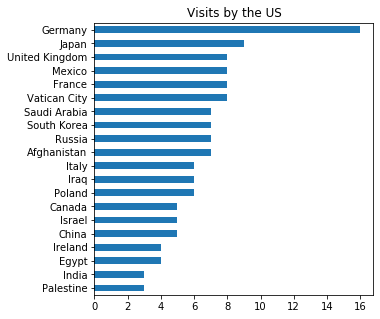

In [184]:
US1.head(20).sort_values(ascending=True).plot(kind='barh', figsize=(5,5), legend=False, title='Visits by the US')
pass

In [185]:
US1.head(20).sort_values(ascending=False)

Germany           16
Japan              9
United Kingdom     8
Mexico             8
France             8
Vatican City       8
Saudi Arabia       7
South Korea        7
Russia             7
Afghanistan        7
Italy              6
Iraq               6
Poland             6
Canada             5
Israel             5
China              5
Ireland            4
Egypt              4
India              3
Palestine          3
Name: Location country, dtype: int64

## Bilateral meetings with Russia

In [186]:
Russia_bil=bilateral[bilateral["Country of president"]=='Russia']

In [187]:
Rus1=Russia_bil['Location country'].value_counts()

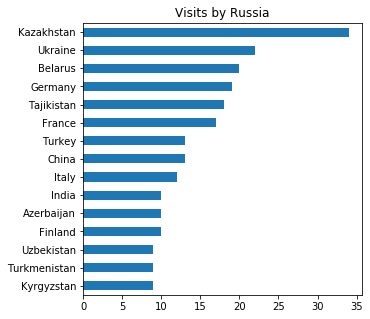

In [188]:
Rus1.head(15).sort_values(ascending=True).plot(kind='barh', figsize=(5,5), legend=False, title='Visits by Russia')
pass

In [189]:
Rus1.head(15).sort_values(ascending=False)

Kazakhstan      34
Ukraine         22
Belarus         20
Germany         19
Tajikistan      18
France          17
Turkey          13
China           13
Italy           12
India           10
Azerbaijan      10
Finland         10
Uzbekistan       9
Turkmenistan     9
Kyrgyzstan       9
Name: Location country, dtype: int64

## Bilateral meetings with China

In [190]:
China_bil=bilateral[bilateral["Country of president"]=='China']

In [191]:
China1=China_bil['Location country'].value_counts()

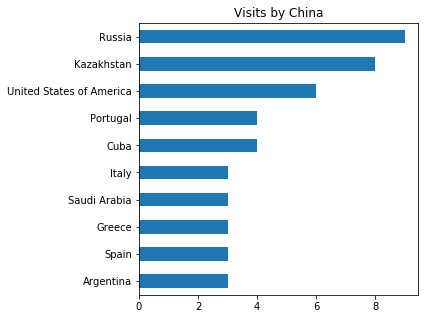

In [192]:
China1.head(10).sort_values(ascending=True).plot(kind='barh', figsize=(5,5), legend=False, title='Visits by China')
pass

In [193]:
China1.head(15).sort_values(ascending=False)

Russia                      9
Kazakhstan                  8
United States of America    6
Portugal                    4
Cuba                        4
India                       3
Turkmenistan                3
Germany                     3
Brazil                      3
United Kingdom              3
Italy                       3
Saudi Arabia                3
Greece                      3
Spain                       3
Argentina                   3
Name: Location country, dtype: int64

## Bilateral meetings by continent

China and US in South America

In [194]:
China_b=bilateral[bilateral['Country of president']=='China'] 

In [195]:
China_s_b=China_b[China_b['continent']=='South America']

In [196]:
China_s_b['year'].value_counts()

2001.0    5
2004.0    2
2014.0    2
2010.0    1
2016.0    1
Name: year, dtype: int64

In [197]:
usa_b=bilateral[bilateral['Country of president']=='USA'] 

In [198]:
usa_s_b=usa_b[usa_b['continent']=='South America']

In [199]:
usa_s_b['year'].value_counts()

2007.0    3
2011.0    2
2004.0    1
2002.0    1
2005.0    1
2018.0    1
2016.0    1
Name: year, dtype: int64

Unfortunately, the numbers are so small that it is not possible to draw conclusions.

In [200]:
China_a_b=China_b[China_b['continent']=='Africa']

In [201]:
China_a_b['year'].value_counts()

2007.0    8
2004.0    4
2009.0    4
2002.0    3
2018.0    3
2006.0    2
2015.0    2
2013.0    2
Name: year, dtype: int64

It seems that looking only at bilateral meeting the trends in Africa and in the South America are same as when looking at whole data.

In [202]:
#It is said that Trump is not so fond of bilateral meetings with allies in Europe. What does the data say?
usa_b=bilateral[bilateral['Country of president']=='USA'] 

In [203]:
USA_a_b=usa_b[usa_b['continent']=='Africa']

In [204]:
USA_a_b['year'].value_counts()

2008.0    7
2003.0    6
2013.0    5
2009.0    2
2015.0    2
Name: year, dtype: int64

In [205]:
USA_e_b=usa_b[usa_b['continent']=='Europe']

In [206]:
years=USA_e_b.groupby(["year"]).size().sort_values(ascending=False)

In [207]:
y=years.to_frame()

In [208]:
y

,0
year,
2008.0,8
2005.0,8
2002.0,7
2014.0,7
2009.0,6
2016.0,6
2007.0,6
2003.0,5
2006.0,5


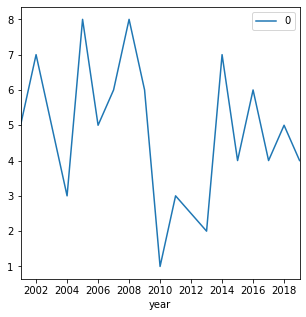

In [209]:
y.sort_values(by=['year']).plot(figsize=(5,5))
pass

There is a pattern of slumps on election years. It looks like in Trump's era there have really been less bilateral meetings than his predecesors in their first term but both of them have had only few of them during the second. Halfway of Obama's term has been very very low. 

## Finally, how about the timings of the visits

creating a dataframe that shows who visited the country first and how many times each president went to each country

In [210]:
loc_country_grps = df.groupby(["Location country"])

In [211]:
loc_country_grps.head()

,Order,Country of president,President,Location continent,Location country,Location city,Date start,Date end,Subject,Participants,Source,Link,year
0,1.0,USA,W. BUSH,NaN,Mexico,San Cristobal,2001-02-16,2001-02-16,Meeting with President Fox.,NaN,NaN,NaN,2001
1,2.0,USA,W. BUSH,NaN,Canada,Quebec,2001-04-20,2001-04-22,Attended the Summit of the Americas.,NaN,NaN,NaN,2001
2,3.0,USA,W. BUSH,NaN,Spain,Madrid,2001-12-06,2001-06-13,Met with King Juan Carlos I and President Aznar.,NaN,NaN,NaN,2001
3,4.0,USA,W. BUSH,NaN,Belgium,Brussels,2001-06-13,2001-06-14,Attended NATO Summit Meeting.,NaN,NaN,NaN,2001
4,5.0,USA,W. BUSH,NaN,Sweden,Goteborg,2001-06-14,2001-06-15,Attended U.S.-European Union Summit Meeting; m...,NaN,NaN,NaN,2001
5,6.0,USA,W. BUSH,NaN,Poland,Warsaw,2001-06-15,2001-06-16,State visit.,NaN,NaN,NaN,2001
6,7.0,USA,W. BUSH,NaN,Slovenia,Kranj,2001-06-16,2001-06-16,Met with Prime Minister Drnovsek and Russian P...,NaN,NaN,NaN,2001
7,8.0,USA,W. BUSH,NaN,United Kingdom,"London, Chequers, Halton, Brize Norton",2001-07-18,2001-07-20,Met with Prime Minister Blain and Queen Elizab...,NaN,NaN,NaN,2001
8,9.0,USA,W. BUSH,NaN,Italy,"Genoa, Castel Gandolfo, Rome",2001-07-20,2001-07-24,Attended the G-8 Economic Summit. Met with Pop...,NaN,NaN,NaN,2001
9,10.0,USA,W. BUSH,NaN,Kosovo,Camp Bondsteel,2001-07-24,2001-07-24,Addressed U.S. military personnel.,NaN,NaN,NaN,2001


In [212]:
country_info = pd.DataFrame({
    "visits": loc_country_grps.size(),
    "num_presidents": loc_country_grps["Country of president"].nunique(),
    "first_us_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "USA"]["Date start"].min()),
    "first_ru_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "Russia"]["Date start"].min()),
    "first_ch_visit": loc_country_grps.apply(lambda grp: grp[grp["Country of president"] == "China"]["Date start"].min()),
    "num_us_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "USA"])),
    "num_ru_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "Russia"])),
    "num_ch_visit": loc_country_grps.apply(lambda grp: len(grp[grp["Country of president"] == "China"]))
})

In [213]:
country_info.reset_index()

,Location country,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit
0,Afghanistan,7,1,2006-01-03,NaT,NaT,7,0,0
1,Albania,1,1,2007-10-06,NaT,NaT,1,0,0
2,Algeria,3,2,NaT,2006-10-03,2004-03-02,0,2,1
3,Angola,1,1,NaT,2009-06-26,NaT,0,1,0
4,Argentina,10,3,2005-03-11,2010-04-15,2001-07-04,3,3,4
5,Armenia,8,1,NaT,2001-05-24,NaT,0,8,0
6,Australia,11,3,2003-10-22,2007-07-09,2003-10-22,4,3,4
7,Austria,6,3,2006-06-20,2001-08-02,2011-10-29,1,4,1
8,Azerbaijan,10,1,NaT,2001-09-01,NaT,0,10,0
9,Bahrain,1,1,2008-12-01,NaT,NaT,1,0,0


In [214]:
#what if everyone went
all_presidents1=country_info.loc[
    lambda x: x["num_presidents"] == 3
].copy()

In [215]:
all_presidents1.reset_index()

,Location country,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit
0,Argentina,10,3,2005-03-11,2010-04-15,2001-07-04,3,3,4
1,Australia,11,3,2003-10-22,2007-07-09,2003-10-22,4,3,4
2,Austria,6,3,2006-06-20,2001-08-02,2011-10-29,1,4,1
3,Belgium,15,3,2001-06-13,2001-01-10,2014-03-30,6,8,1
4,Brazil,13,3,2005-05-11,2004-11-22,2001-11-04,3,5,5
5,Canada,14,3,2001-04-20,2002-06-26,2005-08-09,8,3,3
6,Chile,7,3,2004-11-19,2004-11-19,2001-05-04,2,2,3
7,Croatia,3,3,2008-04-04,2007-06-24,2009-06-20,1,1,1
8,Cuba,7,3,2016-03-20,2008-11-28,2001-12-04,1,2,4
9,Czechia,8,3,2002-11-19,2006-01-03,2016-03-28,4,3,1


In [216]:
all_presidents1.sort_values(by='visits', ascending=False).head(15)

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit
Location country,,,,,,,,
Germany,46,3,2002-05-22,2001-09-12,2002-08-04,20,21,5
France,41,3,2002-05-26,2002-01-15,2004-01-26,14,21,6
Italy,29,3,2001-07-20,2001-07-16,2009-06-07,10,16,3
United Kingdom,26,3,2001-07-18,2001-12-21,2005-07-07,13,9,4
Ukraine,25,3,2008-03-31,2001-07-28,2001-07-21,1,22,2
Japan,22,3,2002-02-17,2005-11-20,2008-07-05,13,5,4
South Korea,20,3,2002-02-19,2001-02-27,2005-11-16,9,6,5
Turkey,18,3,2004-06-26,2004-05-12,2015-11-15,3,14,1
India,18,3,2006-01-03,2002-03-12,2006-11-21,3,10,5


In [217]:
def first_country_to_visit(row):
    first_visit = row[["first_us_visit", "first_ru_visit", "first_ch_visit"]].min()
    if first_visit == row["first_us_visit"]:
        return ("USA", first_visit)
    elif first_visit == row["first_ru_visit"]:
        return ("Russia", first_visit)
    else:
        return ("China", first_visit)

In [218]:
all_presidents1["first_visitor"], all_presidents1["first_visit_date"] = zip(*all_presidents1.apply(lambda x: first_country_to_visit(x), axis=1))

In [219]:
def last_country_to_visit(row):
    last_visit = row[["first_us_visit", "first_ru_visit", "first_ch_visit"]].max()
    if last_visit == row["first_us_visit"]:
        return ("USA", last_visit)
    elif last_visit == row["first_ru_visit"]:
        return ("Russia", last_visit)
    else:
        return ("China", last_visit)

In [220]:
all_presidents1["last_visitor"], all_presidents1["last_visit_date"] = zip(*all_presidents1.apply(lambda x: last_country_to_visit(x), axis=1))

In [221]:
all_presidents1["time_between_first_last_visits"] = all_presidents1\
    .apply(lambda x: (x["last_visit_date"] - x["first_visit_date"]).days, axis=1)

In [222]:
#showing the time differences between each visit by different superpowers. This is something that could be researched more. 
all_presidents1.sort_values("time_between_first_last_visits", ascending=True)

,visits,num_presidents,first_us_visit,first_ru_visit,first_ch_visit,num_us_visit,num_ru_visit,num_ch_visit,first_visitor,first_visit_date,last_visitor,last_visit_date,time_between_first_last_visits
Location country,,,,,,,,,,,,,
Thailand,6,3,2003-10-18,2003-10-17,2003-10-17,3,2,1,Russia,2003-10-17,USA,2003-10-18,1
Germany,46,3,2002-05-22,2001-09-12,2002-08-04,20,21,5,Russia,2001-09-12,China,2002-08-04,326
United Arab Emirates,5,3,2008-01-13,2007-10-09,2007-01-30,1,2,2,China,2007-01-30,USA,2008-01-13,348
Portugal,10,3,2003-03-16,2004-11-23,2004-10-11,2,4,4,USA,2003-03-16,Russia,2004-11-23,618
Hungary,7,3,2006-06-21,2006-02-28,2004-10-06,1,5,1,China,2004-10-06,USA,2006-06-21,623
Saudi Arabia,12,3,2008-01-14,2007-11-02,2006-04-22,7,2,3,China,2006-04-22,USA,2008-01-14,632
Croatia,3,3,2008-04-04,2007-06-24,2009-06-20,1,1,1,Russia,2007-06-24,China,2009-06-20,727
France,41,3,2002-05-26,2002-01-15,2004-01-26,14,21,6,Russia,2002-01-15,China,2004-01-26,741
Egypt,11,3,2003-02-06,2005-04-26,2004-01-29,4,4,3,USA,2003-02-06,Russia,2005-04-26,810


---

---

---